# MNIST dataset

Here we use a mlp to perform the classification on MNIST data set.

After some experiments we choose to use a mlp with two hidden layers, each has 48 neurons with ReLU activation function in between, and Softmax activation function in the last layer

In [1]:
from SimpleNNs.mlp import *
from torch import Tensor
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [2]:
mlp = MLP(layers=[
    Linear(28*28, 48),
    Relu(),
    Linear(48, 48),
    Relu(),
    Linear(48, 10),
    Softmax(),
], 
    loss=CrossEntropyLoss())

load the dataset and normalize 

then split to train and validation set

In [3]:

# load MNIST dataset and normalize it
train_dataset = MNIST(root='../data', download=True, train=True)
shuffle = torch.randperm(60000)
x = train_dataset.data[shuffle]
t = train_dataset.targets[shuffle]

x_train, t_train = x[:58000], t[:58000]
x_val, t_val = x[58000:], t[58000:]

x_train = x_train.reshape(-1, 28 * 28).float()
train_mean = torch.mean(x_train, dim=1, keepdim=True)
train_std = torch.std(x_train, dim=1, keepdim=True)
x_train = (x_train - train_mean) / train_std
t_train = torch.eye(10).float()[t_train]

x_val = x_val.reshape(-1, 28 * 28).float()
val_mean = torch.mean(x_val, dim=1, keepdim=True)
val_std = torch.std(x_val, dim=1, keepdim=True)
x_val = (x_val - val_mean) / val_std

Train the mlp with hyperparameters

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24


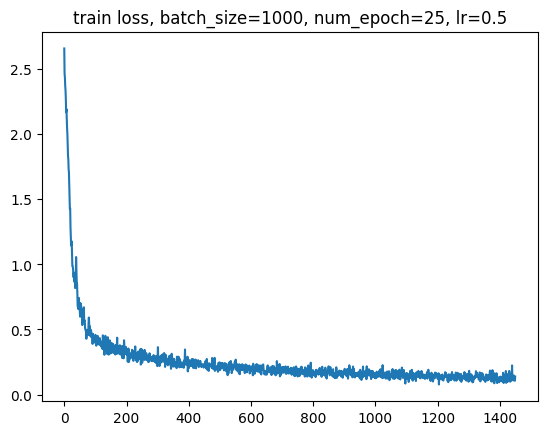

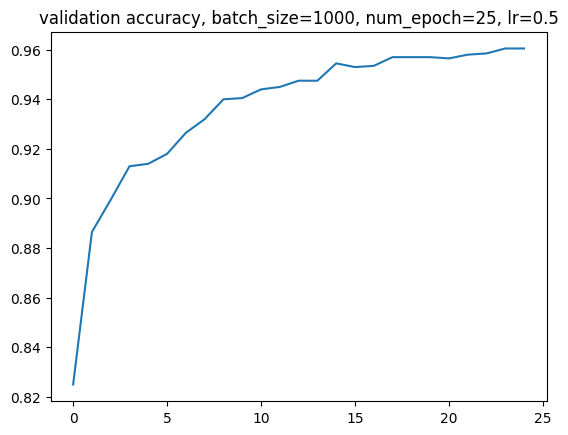

In [4]:
mlp.train(x_train, t_train, x_val, t_val, batch_size=1000, num_epochs=25, lr=0.5)

test the dataset

In [5]:
test_dataset = MNIST('../data', download=True, train=False)
x_test, t_test = test_dataset.test_data.clone(), test_dataset.test_labels.clone()

x_test = x_test.reshape(-1, 28 * 28).float()
test_mean = torch.mean(x_test, dim=1, keepdim=True)
test_std = torch.std(x_test, dim=1, keepdim=True)
x_test = (x_test - test_mean) / test_std

y_test = torch.argmax(mlp.forward(x_test), dim=1)
print("test accuracy:", (y_test == t_test).sum().item() / len(t_test))

test accuracy: 0.9598


/home/alwyn/anaconda3/envs/torch/lib/python3.12/site-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/alwyn/anaconda3/envs/torch/lib/python3.12/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
